# <center>ML Dataset Pipline Project</center>

In [1]:
# Importing all the necessary modules

In [92]:
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

In [93]:
# the main aim is to understand the variation of life expectancy based on various parameters collected in the data

## DATA ANALYSIS

#### 1. Exploration

In [94]:
df = pd.read_csv("Life Expectancy Data.csv")
df.head()

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   thinness  1-19 years  thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

In [95]:
# Here I am trying to convert float values to int so that I  can apply classification models
df["Life expectancy"] = df["Life expectancy"].apply(np.floor)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [97]:
df.describe()

Year  Life expectancy  Adult Mortality  infant deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        68.824112       164.796448      30.303948   
std       4.613841         9.553983       124.292079     117.926501   
min    2000.000000        36.000000         1.000000       0.000000   
25%    2004.000000        63.000000        74.000000       0.000000   
50%    2008.000000        72.000000       144.000000       3.000000   
75%    2012.000000        75.000000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B        Measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               BMI  under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness  1-19 years  thinness 5-9 years  \
count           2904.000000         2904.000000   
mean               4.839704            4.870317   
std                4.420195            4.508882   
min                0.100000            0.100000   
25%                1.600000            1.500000   
50%                3.300000            3.300000   
75%                7.200000            7.200000   
max               27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

#### 2. Cleaning

In [98]:
# we are using the analysis to find out the best strategies for data cleaning and 

In [99]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

Except population, the other null values can be easily filled with the mean fill as observed in the exploration of the data. So we can replace these values with their mean values without affecting the properties of the dataset much. 

For handling the population, if we look at the missing values individually and compare them with the
sources at wikipedia, we find that most values are comparable to bottom 25 percent mean of the data.

#### 3. Plotting

<AxesSubplot:>

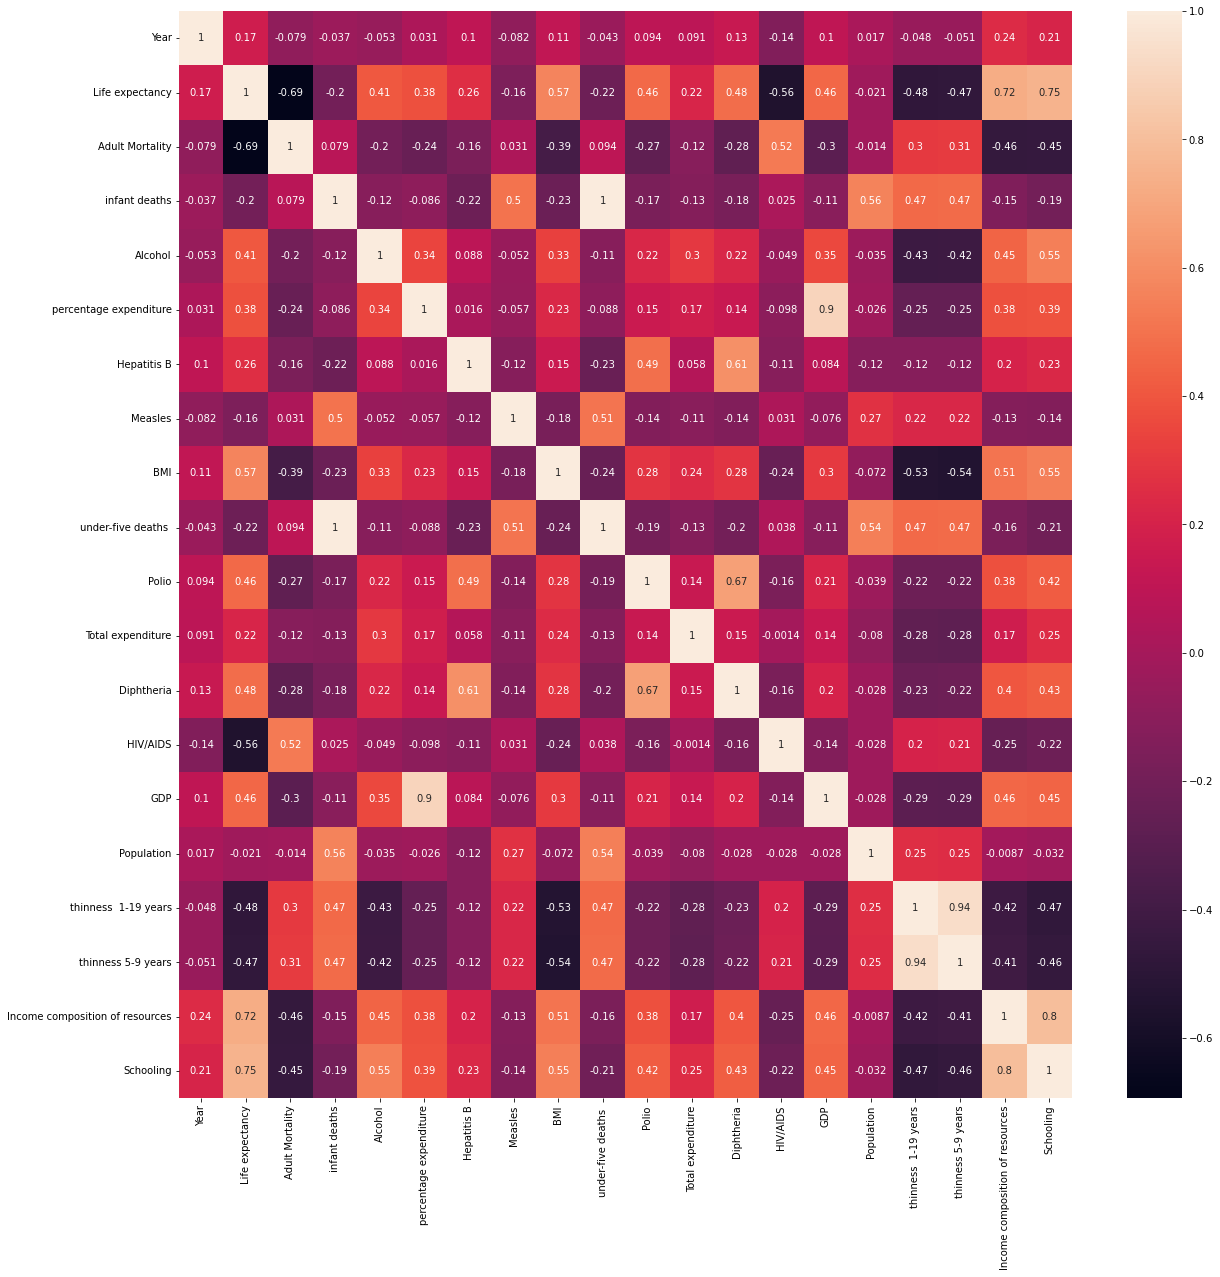

In [65]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [66]:
# subplots

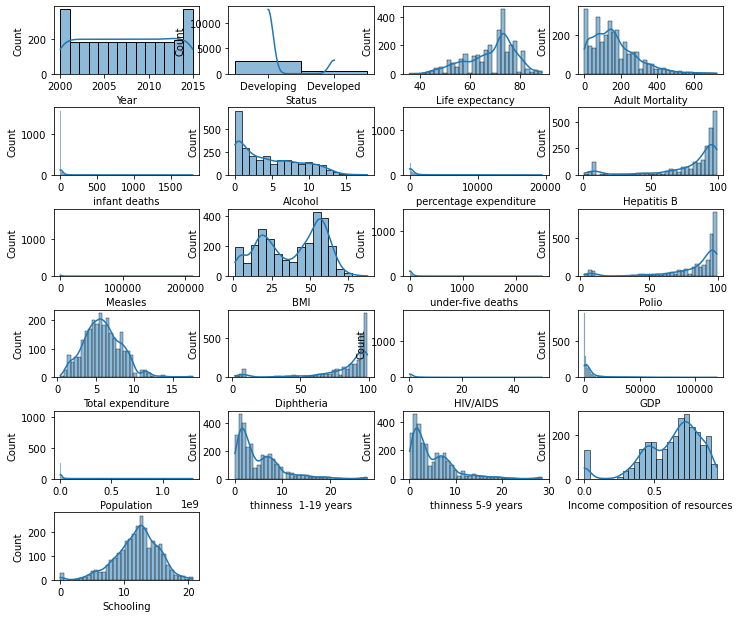

In [68]:
plt.figure(figsize=(12,18))
plt.subplots_adjust(hspace=0.5)
i = 1
for col_name in df.drop("Country", axis=1).columns:
    plt.subplot(10,4, i)
    sns.histplot(data=df, x=col_name, kde=True,  multiple='layer', alpha=0.5, palette='viridis')
    i += 1

In [20]:
# Box-plots

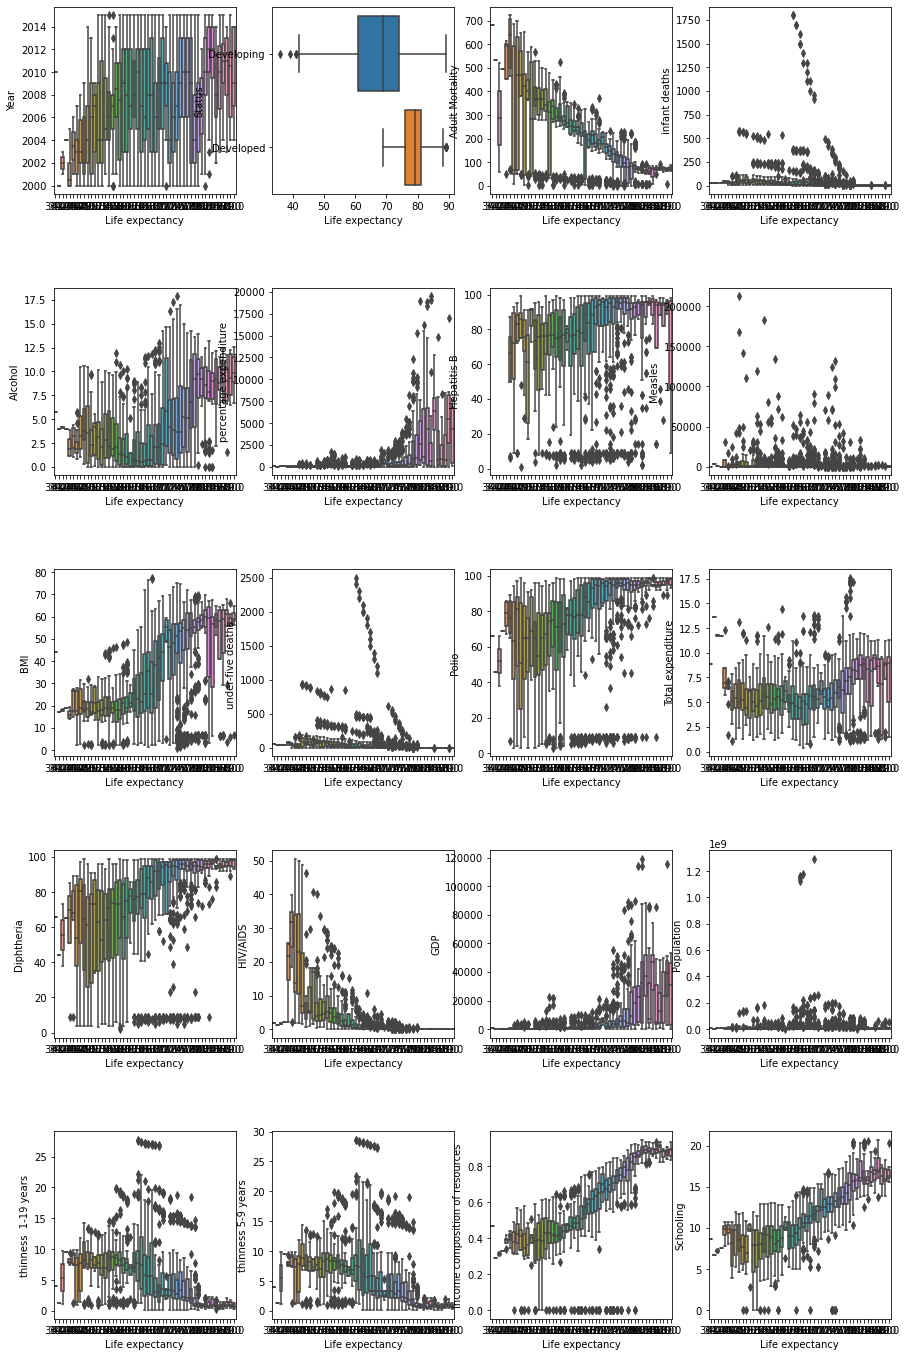

In [70]:
plt.figure(figsize=(15,50))
plt.subplots_adjust(hspace=0.5)
i=1
for col_name in df.drop(columns=['Life expectancy', "Country"],axis=1).columns:
    plt.subplot(10,4, i)
    sns.boxplot(data=df, x='Life expectancy', y=col_name)
    i+=1

In [76]:
# pair-plots

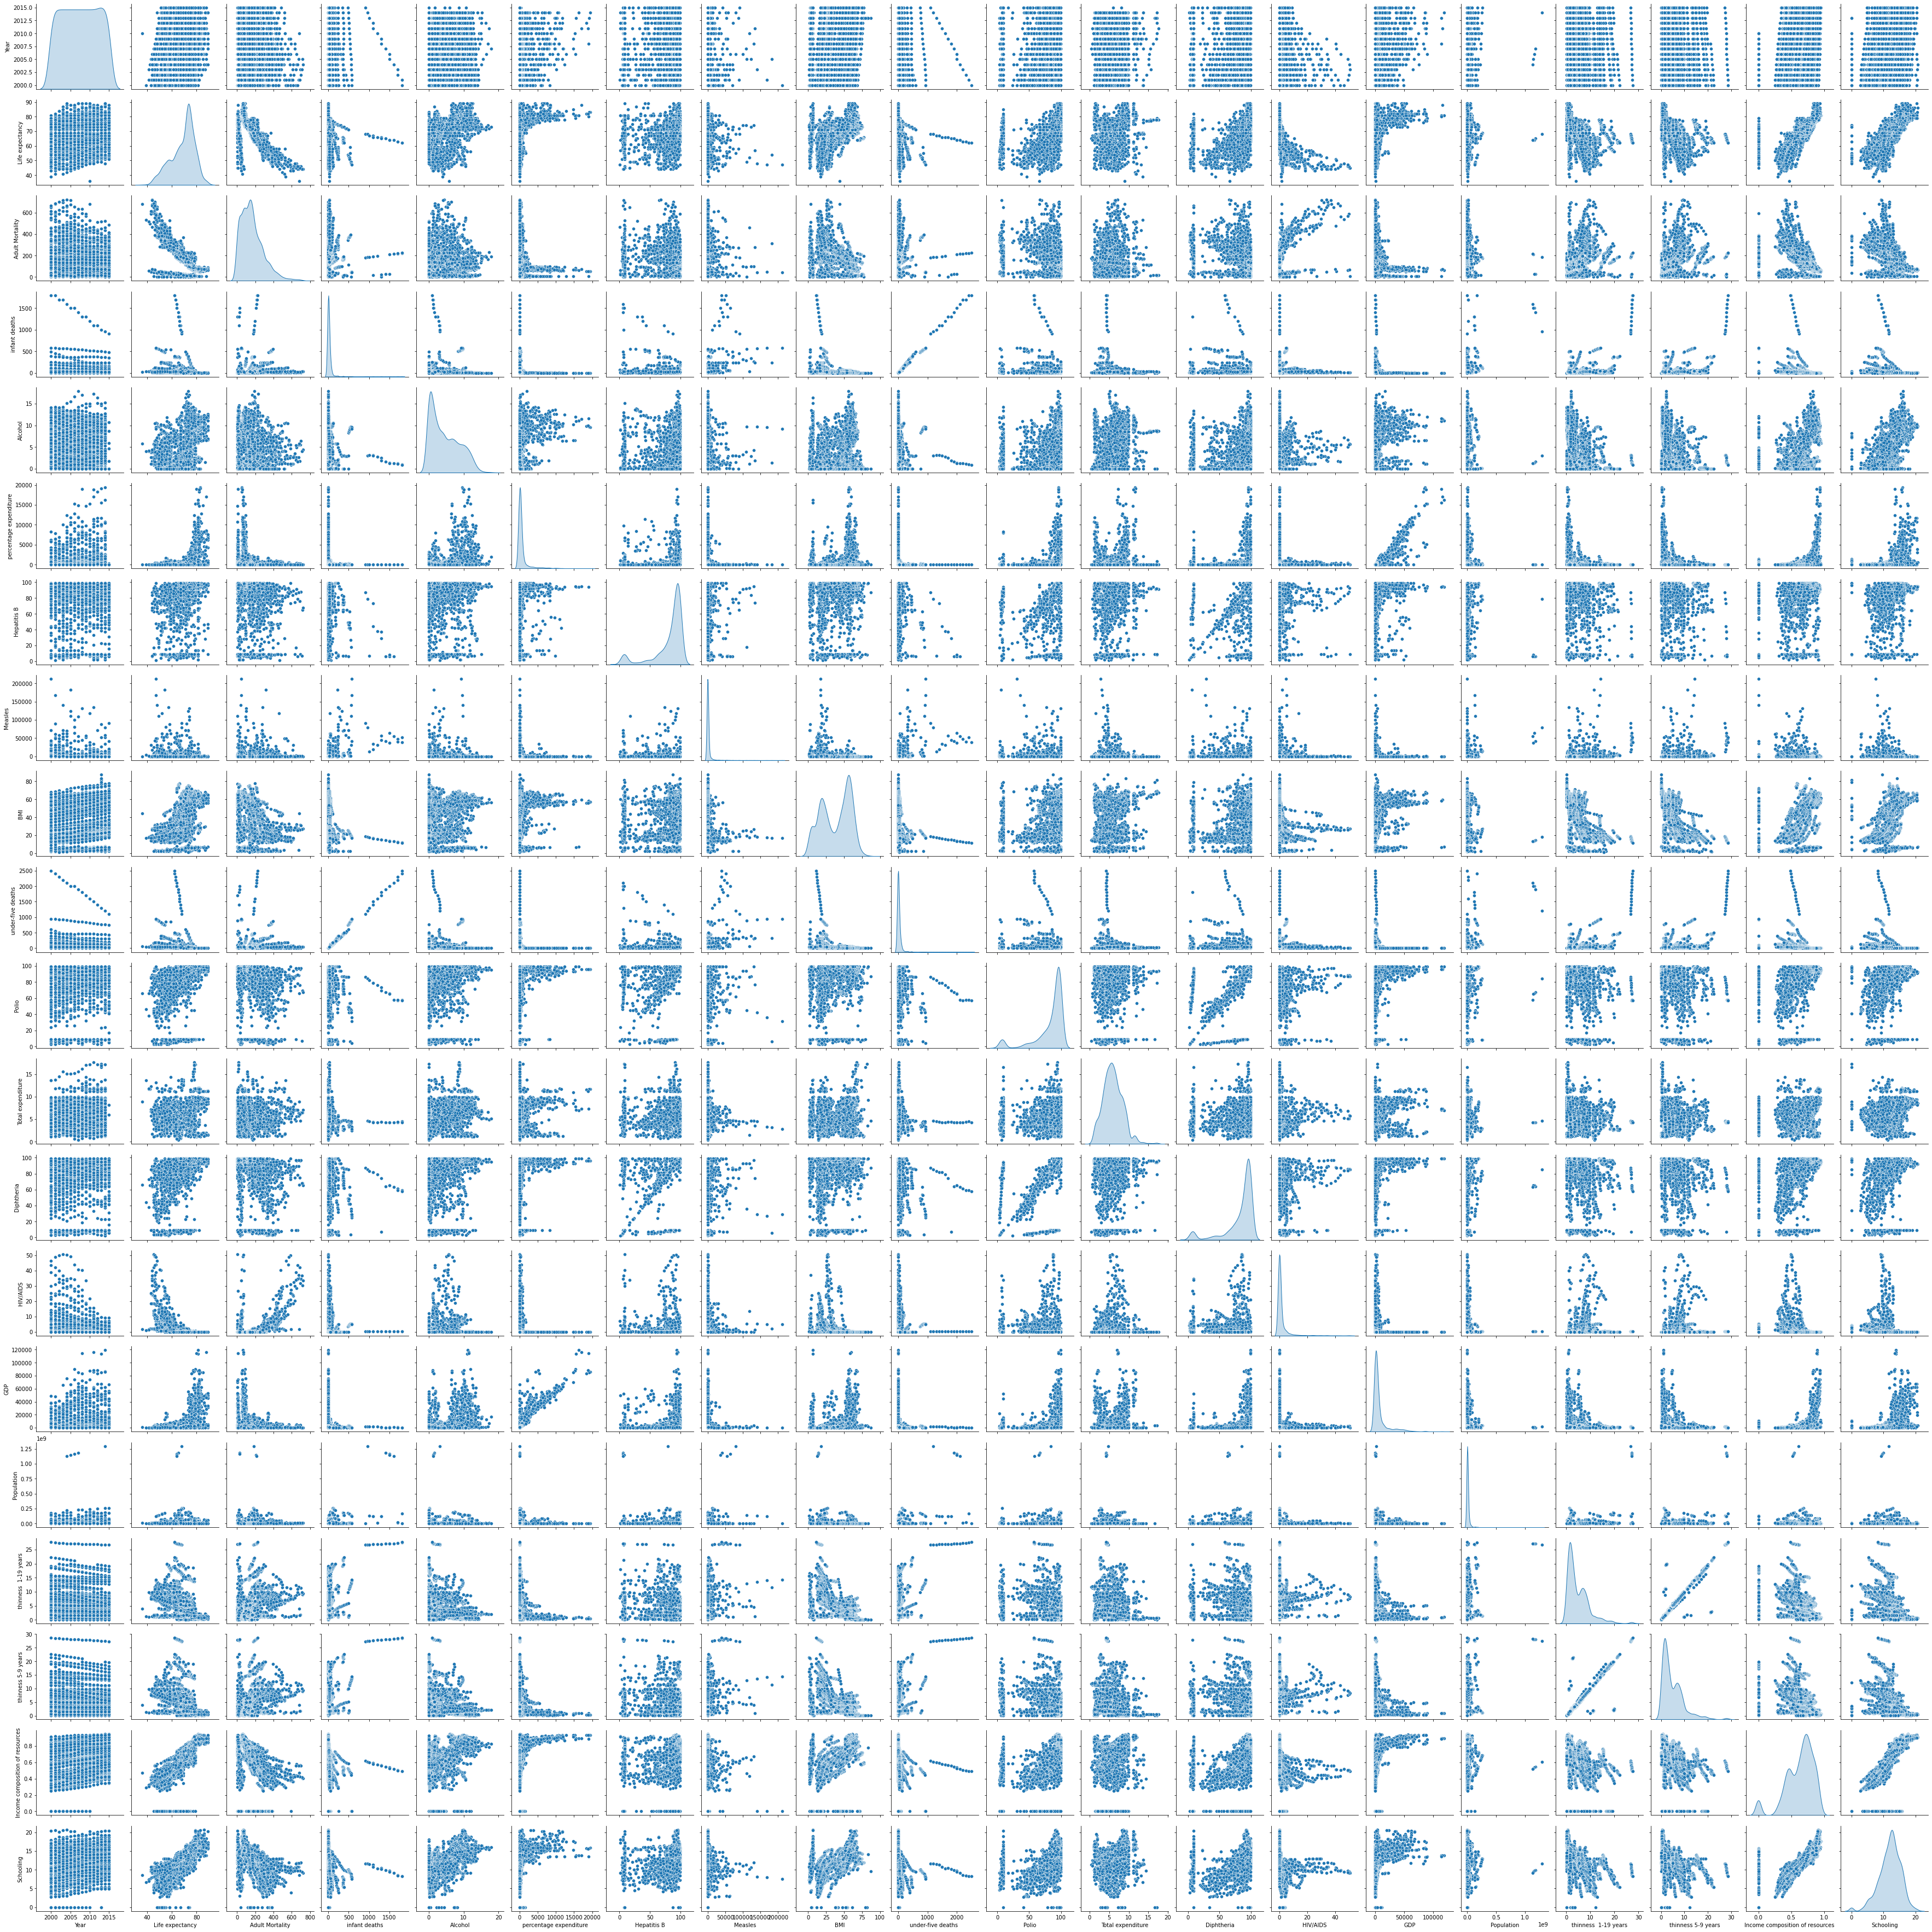

In [22]:
sns.pairplot(df,diag_kind = 'kde',kind = 'scatter',palette = 'husl')

### 1. OUTLIERS

In [26]:
# using k-score method

iqr = df.quantile(0.75) - df.quantile(0.25)
lower = df.quantile(0.25) - 1.5*iqr
upper = df.quantile(0.75) + 1.5*iqr

print("Number of outliers")
((df < lower) + (df > upper)).sum()


Number of outliers


Adult Mortality                     82
Alcohol                              0
BMI                                  0
Country                              0
Diphtheria                         298
GDP                                365
HIV/AIDS                           542
Hepatitis B                        254
Income composition of resources    130
Life expectancy                     19
Measles                            542
Polio                              279
Population                         294
Schooling                           44
Status                               0
Total expenditure                   32
Year                                 0
infant deaths                      315
percentage expenditure             389
thinness  1-19 years                89
thinness 5-9 years                  96
under-five deaths                  394
dtype: int64

In [27]:
iqr = df.quantile(0.75) - df.quantile(0.25)
lower = df.quantile(0.25) - 3*iqr
upper = df.quantile(0.75) + 3*iqr

print("Number of outliers")
((df < lower) + (df > upper)).sum()


Number of outliers


Adult Mortality                      5
Alcohol                              0
BMI                                  0
Country                              0
Diphtheria                         172
GDP                                266
HIV/AIDS                           403
Hepatitis B                        170
Income composition of resources      0
Life expectancy                      0
Measles                            451
Polio                              173
Population                         203
Schooling                            0
Status                               0
Total expenditure                    4
Year                                 0
infant deaths                      158
percentage expenditure             300
thinness  1-19 years                16
thinness 5-9 years                  16
under-five deaths                  195
dtype: int64

#### Observation
There are extreme outliers in the data.

###  2. Imputing and Encoding

Label Encoding

In [100]:
# Label encoding for status of countries
# Label Encoding on the Package attribute
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
#Assigning numerical values and storing in another column
df['Status'] = labelencoder.fit_transform(df['Status'])
# reverse function because it assigned opposite value to "developing" and "developed"
def reverse(x):
    if x == 0:
        return 1
    elif x == 1:
        return 0
df["Status"] = df['Status'].apply(reverse)
df.describe()

Year       Status  Life expectancy  Adult Mortality  \
count  2938.000000  2938.000000      2928.000000      2928.000000   
mean   2007.518720     0.174268        68.824112       164.796448   
std       4.613841     0.379405         9.553983       124.292079   
min    2000.000000     0.000000        36.000000         1.000000   
25%    2004.000000     0.000000        63.000000        74.000000   
50%    2008.000000     0.000000        72.000000       144.000000   
75%    2012.000000     0.000000        75.000000       228.000000   
max    2015.000000     1.000000        89.000000       723.000000   

       infant deaths      Alcohol  percentage expenditure  Hepatitis B  \
count    2938.000000  2744.000000             2938.000000  2385.000000   
mean       30.303948     4.602861              738.251295    80.940461   
std       117.926501     4.052413             1987.914858    25.070016   
min         0.000000     0.010000                0.000000     1.000000   
25%         0.000000     0.877500                4.685343    77.000000   
50%         3.000000     3.755000               64.912906    92.000000   
75%        22.000000     7.702500              441.534144    97.000000   
max      1800.000000    17.870000            19479.911610    99.000000   

             Measles          BMI  ...        Polio  Total expenditure  \
count    2938.000000  2904.000000  ...  2919.000000         2712.00000   
mean     2419.592240    38.321247  ...    82.550188            5.93819   
std     11467.272489    20.044034  ...    23.428046            2.49832   
min         0.000000     1.000000  ...     3.000000            0.37000   
25%         0.000000    19.300000  ...    78.000000            4.26000   
50%        17.000000    43.500000  ...    93.000000            5.75500   
75%       360.250000    56.200000  ...    97.000000            7.49250   
max    212183.000000    87.300000  ...    99.000000           17.60000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness  1-19 years  thinness 5-9 years  \
count           2904.000000         2904.000000   
mean               4.839704            4.870317   
std                4.420195            4.508882   
min                0.100000            0.100000   
25%                1.600000            1.500000   
50%                3.300000            3.300000   
75%                7.200000            7.200000   
max               27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000  

[8 rows x 21 columns]

Imputation of dataset with median as there are outliers (using sklearn)

In [101]:
df = df.drop('Country', axis = 1)

In [102]:
from sklearn.impute import SimpleImputer
simple_imputer = SimpleImputer(strategy='median')

cols_nan = df.columns[df.isnull().sum() > 0]
simple_imputer.fit(df)
df[cols_nan] = simple_imputer.fit_transform(df[cols_nan])

In [103]:
df.describe()

Year       Status  Life expectancy  Adult Mortality  \
count  2938.000000  2938.000000      2938.000000      2938.000000   
mean   2007.518720     0.174268        68.834922       164.725664   
std       4.613841     0.379405         9.539498       124.086215   
min    2000.000000     0.000000        36.000000         1.000000   
25%    2004.000000     0.000000        63.000000        74.000000   
50%    2008.000000     0.000000        72.000000       144.000000   
75%    2012.000000     0.000000        75.000000       227.000000   
max    2015.000000     1.000000        89.000000       723.000000   

       infant deaths      Alcohol  percentage expenditure  Hepatitis B  \
count    2938.000000  2938.000000             2938.000000  2938.000000   
mean       30.303948     4.546875              738.251295    83.022124   
std       117.926501     3.921946             1987.914858    22.996984   
min         0.000000     0.010000                0.000000     1.000000   
25%         0.000000     1.092500                4.685343    82.000000   
50%         3.000000     3.755000               64.912906    92.000000   
75%        22.000000     7.390000              441.534144    96.000000   
max      1800.000000    17.870000            19479.911610    99.000000   

             Measles          BMI  ...        Polio  Total expenditure  \
count    2938.000000  2938.000000  ...  2938.000000        2938.000000   
mean     2419.592240    38.381178  ...    82.617767           5.924098   
std     11467.272489    19.935375  ...    23.367166           2.400770   
min         0.000000     1.000000  ...     3.000000           0.370000   
25%         0.000000    19.400000  ...    78.000000           4.370000   
50%        17.000000    43.500000  ...    93.000000           5.755000   
75%       360.250000    56.100000  ...    97.000000           7.330000   
max    212183.000000    87.300000  ...    99.000000          17.600000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2938.000000  2938.000000    2938.000000  2.938000e+03   
mean     82.393125     1.742103    6611.523863  1.023085e+07   
std      23.655562     5.077785   13296.603449  5.402242e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     580.486996  4.189172e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    4779.405190  4.584371e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness  1-19 years  thinness 5-9 years  \
count           2938.000000         2938.000000   
mean               4.821886            4.852144   
std                4.397621            4.485854   
min                0.100000            0.100000   
25%                1.600000            1.600000   
50%                3.300000            3.300000   
75%                7.100000            7.200000   
max               27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2938.000000  2938.000000  
mean                          0.630362    12.009837  
std                           0.205140     3.265139  
min                           0.000000     0.000000  
25%                           0.504250    10.300000  
50%                           0.677000    12.300000  
75%                           0.772000    14.100000  
max                           0.948000    20.700000  

[8 rows x 21 columns]

In [104]:
df.isnull().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

#### Step 3: Skewness

In [105]:
from scipy.stats import skew
print("Skewness scores for all columns:")
for column in df.columns:
    print(f"{column} : {skew(df[column])}")

Skewness scores for all columns:
Year : -0.00640575475736738
Status : 1.7173608359723287
Life expectancy : -0.626054089338714
Adult Mortality : 1.177297957079675
infant deaths : 9.781965494027151
Alcohol : 0.6492464598810169
percentage expenditure : 4.649675899609289
Hepatitis B : -2.2805323384822267
Measles : 9.436510978085607
BMI : -0.22903982551937418
under-five deaths  : 9.490216250784258
Polio : -2.10783252934917
Total expenditure : 0.660770643209122
Diphtheria : -2.0825016566936276
HIV/AIDS : 5.393356658787256
GDP : 3.5419463472945982
Population : 17.963659758332124
thinness  1-19 years : 1.7286132674805903
thinness 5-9 years : 1.7947768345535493
Income composition of resources : -1.2119068049052284
Schooling : -0.6347273563646453


We need to deal with highly skewed values so that they can have more normal distribution and can be used in data better.

#### Observations:
We can observe that infant deaths, percentage expenditure, Measles, under-five deaths, Population have very high skew values and should be changed so that they have a low skew value.

1. Measles

In [34]:
# changing the value of Measles to logarithmic distrubution
from scipy import stats
Measles_sqrt = np.sqrt(np.sqrt(df["Measles"]))
print(skew(Measles_sqrt))

1.6593843852266528


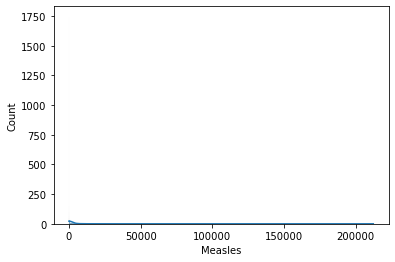

In [35]:
sns.histplot(data=df, x='Measles', kde=True,  multiple='layer', alpha=0.5, palette='viridis')
df["Measles"] = Measles_sqrt # to increase the normal characteristics in the distribution

<AxesSubplot:xlabel='Measles', ylabel='Count'>

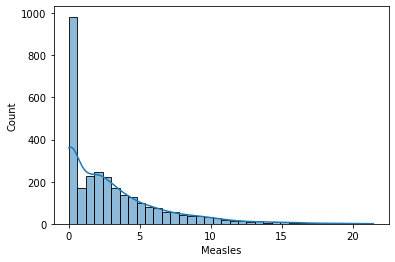

In [36]:
sns.histplot(data=df, x='Measles', kde=True,  multiple='layer', alpha=0.5, palette='viridis')

2. Percentage Expenditure

In [37]:
percentage_sqrt = np.sqrt(np.sqrt(df["percentage expenditure"]))
print(skew(percentage_sqrt))

0.7293622518616779


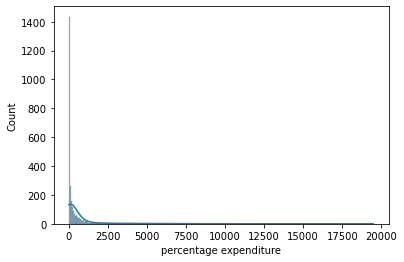

In [38]:
sns.histplot(data=df, x='percentage expenditure', kde=True,  multiple='layer', alpha=0.5, palette='viridis')
df["percentage expenditure"] = percentage_sqrt # to increase the normal characteristics in the distribution

<AxesSubplot:xlabel='percentage expenditure', ylabel='Count'>

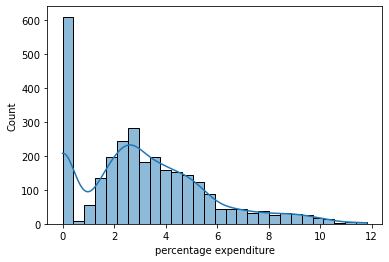

In [39]:
sns.histplot(data=df, x='percentage expenditure', kde=True,  multiple='layer', alpha=0.5, palette='viridis')

3.  Under-five Deaths

0.7280441896528532


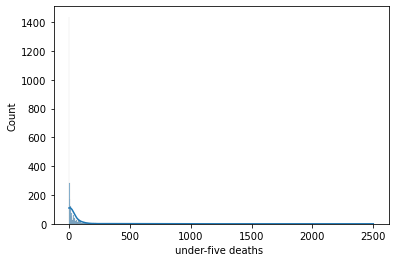

In [40]:
under_five_deaths_sqrt = np.sqrt(np.sqrt(df["under-five deaths "]))
print(skew(under_five_deaths_sqrt))
sns.histplot(data=df, x='under-five deaths ', kde=True,  multiple='layer', alpha=0.5, palette='viridis')
df["under-five deaths "] = under_five_deaths_sqrt # to increase the normal characteristics in the distribution

<AxesSubplot:xlabel='under-five deaths ', ylabel='Count'>

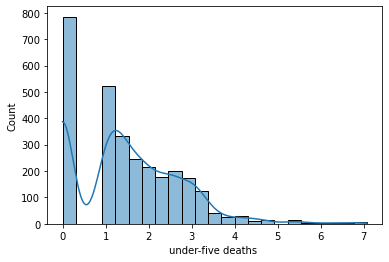

In [41]:
sns.histplot(data=df, x='under-five deaths ', kde=True,  multiple='layer', alpha=0.5, palette='viridis')

4. Population 

0.4699172794706377


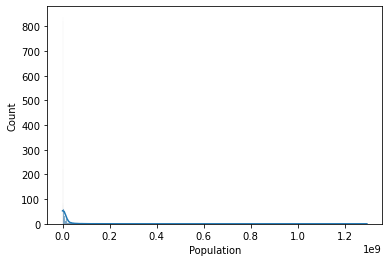

In [42]:
population_sqrt = np.sqrt(np.sqrt(np.sqrt(df["Population"])))
print(skew(population_sqrt))
sns.histplot(data=df, x='Population', kde=True,  multiple='layer', alpha=0.5, palette='viridis')
df["Population"] = population_sqrt # to increase the normal characteristics in the distribution

<AxesSubplot:xlabel='Population', ylabel='Count'>

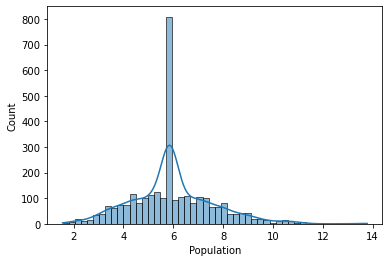

In [43]:
sns.histplot(data=df, x='Population', kde=True,  multiple='layer', alpha=0.5, palette='viridis')

5. Infant Deaths

0.6800747101194495


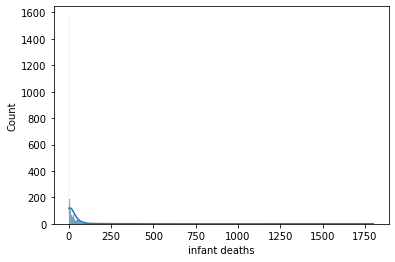

In [44]:
infant_deaths_sqrt = np.sqrt(np.sqrt(df["infant deaths"]))
print(skew(infant_deaths_sqrt))
sns.histplot(data=df, x='infant deaths', kde=True,  multiple='layer', alpha=0.5, palette='viridis')
df["infant deaths"] = infant_deaths_sqrt # to increase the normal characteristics in the distribution

<AxesSubplot:xlabel='infant deaths', ylabel='Count'>

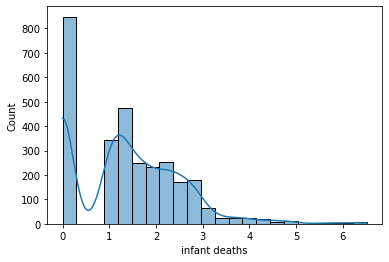

In [45]:
sns.histplot(data=df, x='infant deaths', kde=True,  multiple='layer', alpha=0.5, palette='viridis')

Skewness reduced quite a bit. Transforming skewed data is one critical step during the data cleaning process. 

### Step 4: Feature Selection

#### Pearson's Correlation Test

Life expectancy                    1.000000
Schooling                          0.711727
Income composition of resources    0.687596
BMI                                0.555705
Status                             0.481988
Diphtheria                         0.471509
Polio                              0.457815
GDP                                0.430785
percentage expenditure             0.422771
Alcohol                            0.389835
Total expenditure                  0.209902
Year                               0.170270
Hepatitis B                        0.169765
Population                        -0.086684
Measles                           -0.317074
thinness 5-9 years                -0.462735
thinness  1-19 years              -0.468263
HIV/AIDS                          -0.555277
infant deaths                     -0.561435
under-five deaths                 -0.586795
Adult Mortality                   -0.694203
Name: Life expectancy, dtype: float64

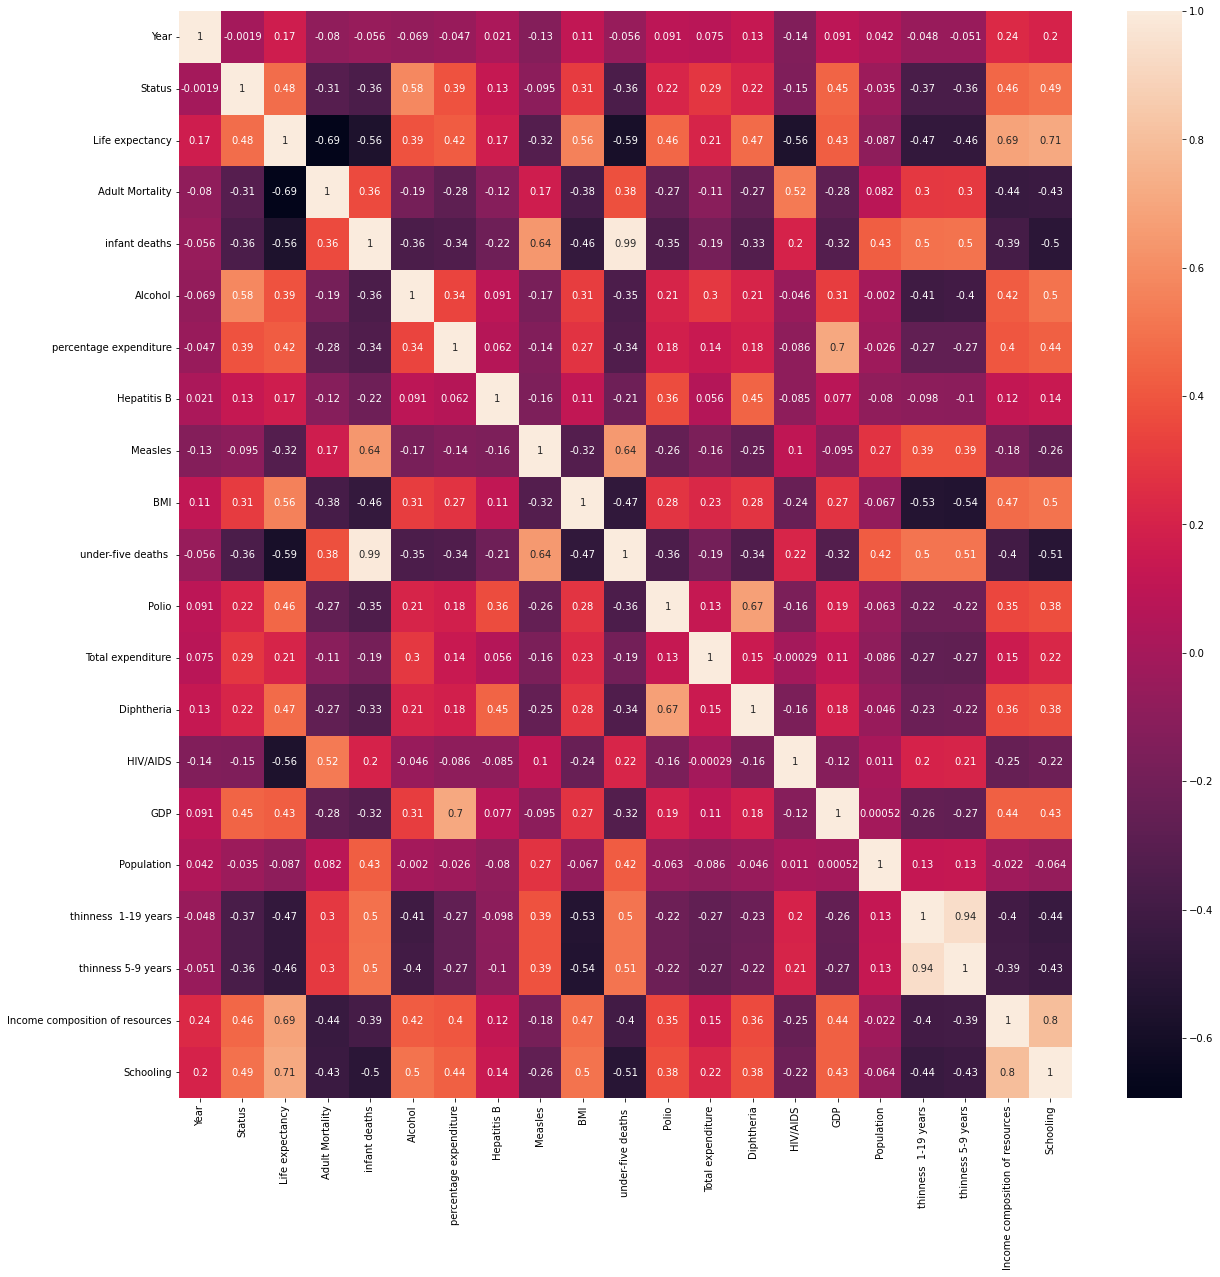

In [46]:
# Heatmap after all changes in the data
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
df.corr()['Life expectancy'].sort_values(ascending=False)

<u>Observations:</u>

The following data points have a very high correlation:
<ol>
    <li>Under five deaths & Infant deaths (0.99) </li>
    <li>GDP & percentage expenditure (0.7) </li>
    <li>Dipteria & Polio (0.67) </li>
    <li>Thinness 5-9 years & Thinness 1-19 years (0.94) </li>
    <li>Income compostion of resources & Schooling (0.8) </li>
</ol>

#### Information gain

The feature scores generated using Information Gain method are: 
Feature Adult Mortality: 1.233028
Feature Income composition of resources: 0.871335
Feature thinness 5-9 years: 0.702189
Feature thinness  1-19 years: 0.681543
Feature Schooling: 0.645813
Feature HIV/AIDS: 0.540649
Feature BMI: 0.498389
Feature under-five deaths : 0.453037
Feature infant deaths: 0.452636
Feature GDP: 0.355750
Feature Alcohol: 0.337077
Feature percentage expenditure: 0.324201
Feature Polio: 0.295999
Feature Diphtheria: 0.286165
Feature Population: 0.282970
Feature Total expenditure: 0.225169
Feature Status: 0.197888
Feature Hepatitis B: 0.194196
Feature Measles: 0.118071
Feature Year: 0.058456


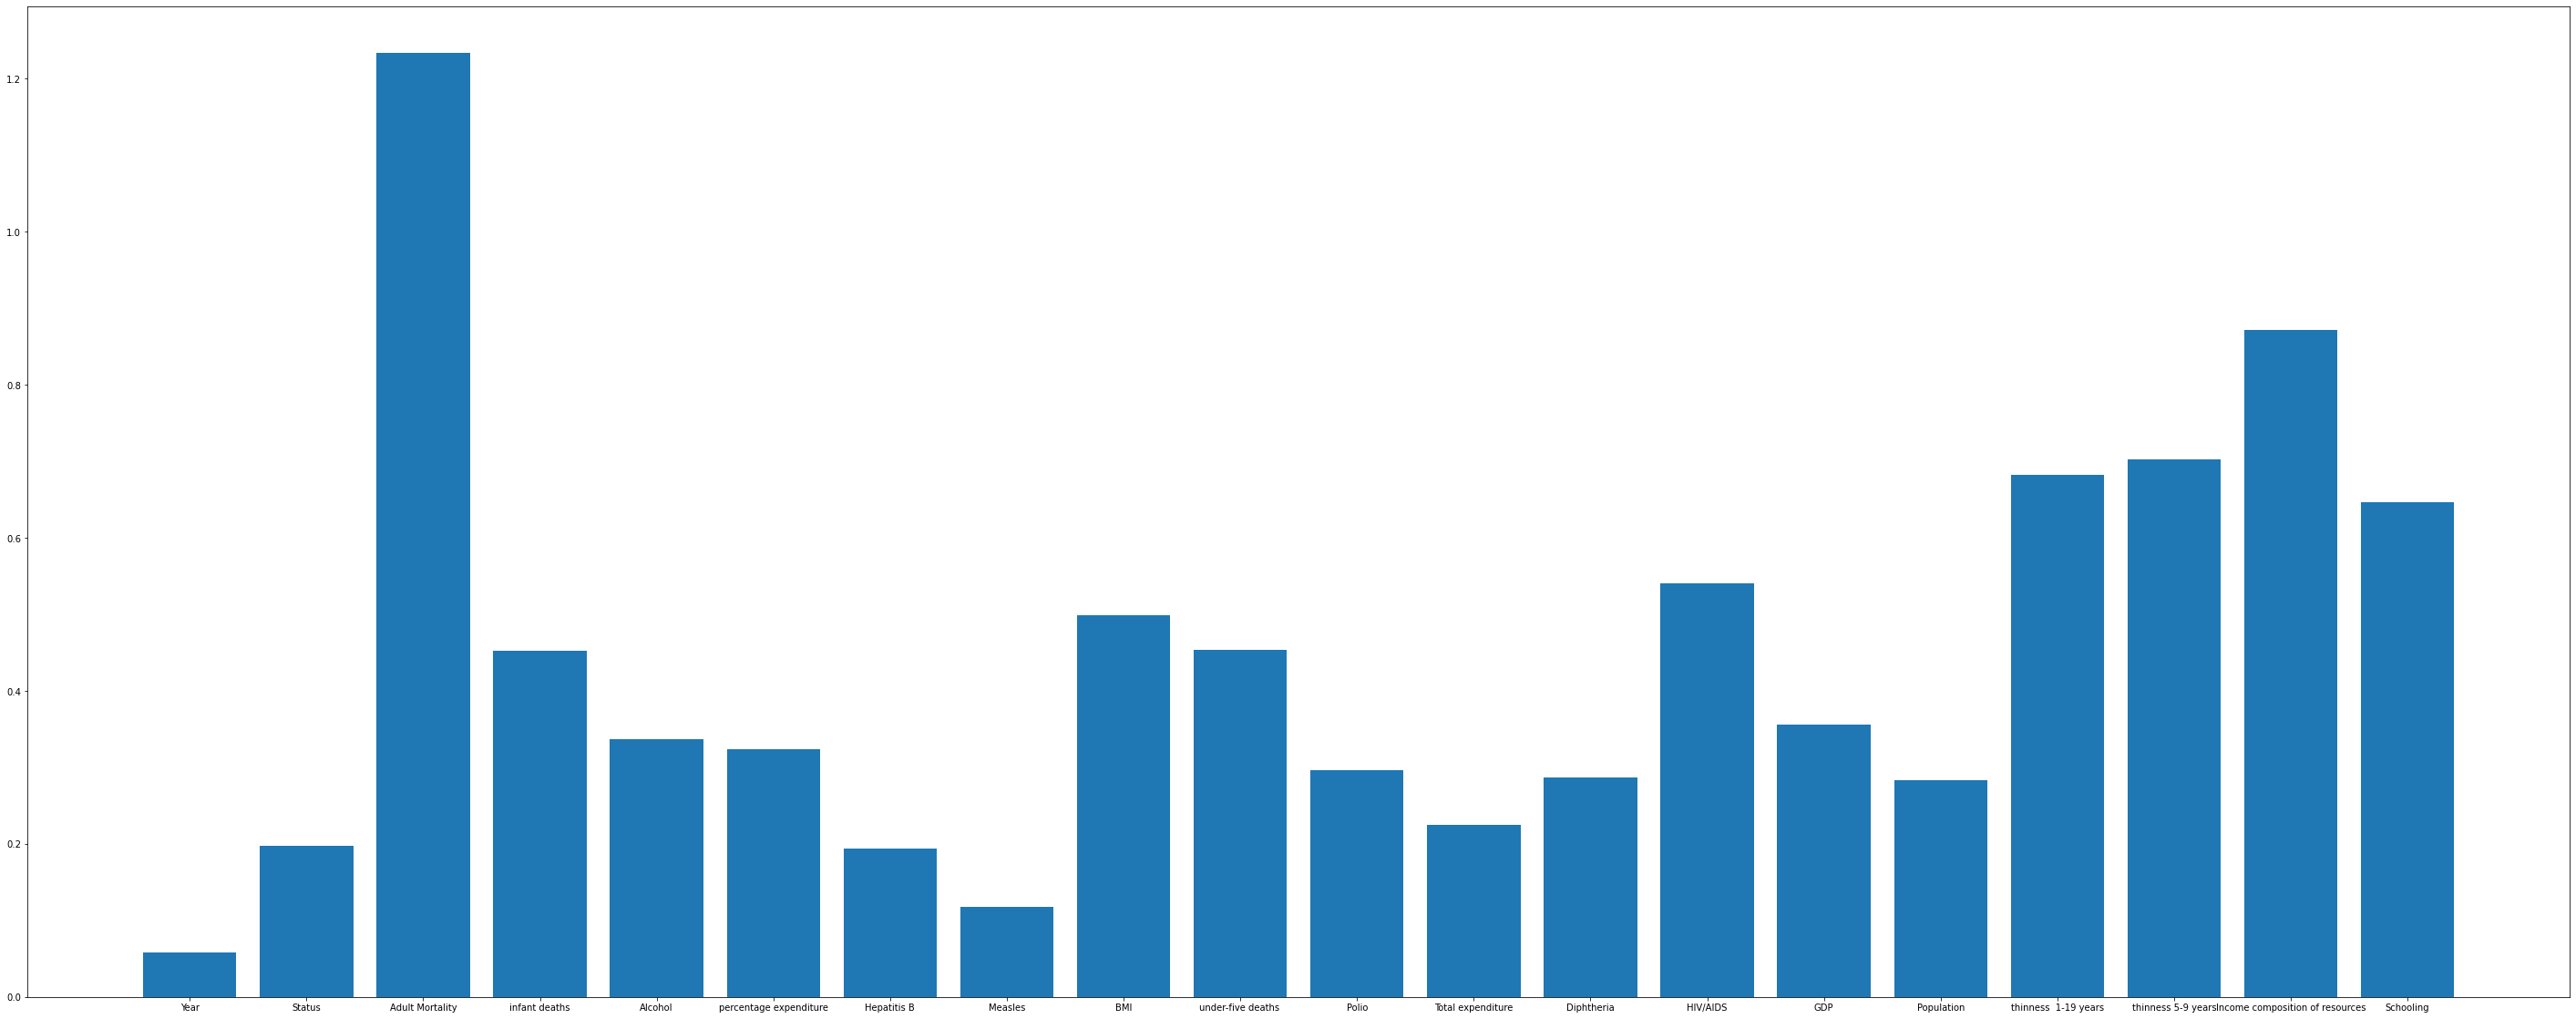

In [49]:
# example of mutual information feature selection for numerical input data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
import matplotlib as plt

X = df.drop(columns = ["Life expectancy"], axis = 1) #feature matrix
y = df["Life expectancy"] #target

fs = SelectKBest(score_func=mutual_info_classif, k='all')
# learn relationship from training data
fs.fit(X, y)
# transform train input data
X_train_fs = fs.transform(X)
features = X.columns
print("The feature scores generated using Information Gain method are: ")
features_map = []
for i in range(len(fs.scores_)):
    features_map.append([features[i], float(fs.scores_[i])])
features_map = sorted(features_map, key=lambda x:x[1], reverse = True)
for i in range(len(fs.scores_)):
	print('Feature %s: %f' % (features_map[i][0], features_map[i][1]))
# plot the scores
pyplot.figure(figsize=(50,20))
pyplot.bar([i for i in features], fs.scores_)
pyplot.show()

#### ANOVA Feature Test

Now we are going to conduct ANOVA method test to find best features for the dataset.

The feature scores generated using ANVOA method are: 
Feature Schooling: 72.903929
Feature HIV/AIDS: 69.718311
Feature Income composition of resources: 60.982251
Feature Adult Mortality: 60.199683
Feature Status: 45.639800
Feature under-five deaths : 35.082649
Feature GDP: 34.619193
Feature infant deaths: 30.931230
Feature BMI: 29.888684
Feature percentage expenditure: 22.682497
Feature thinness  1-19 years: 22.436474
Feature thinness 5-9 years: 22.374606
Feature Alcohol: 20.362363
Feature Diphtheria: 19.152127
Feature Polio: 18.232205
Feature Measles: 10.230343
Feature Total expenditure: 8.198888
Feature Year: 7.763387
Feature Hepatitis B: 4.025638
Feature Population: 1.740372


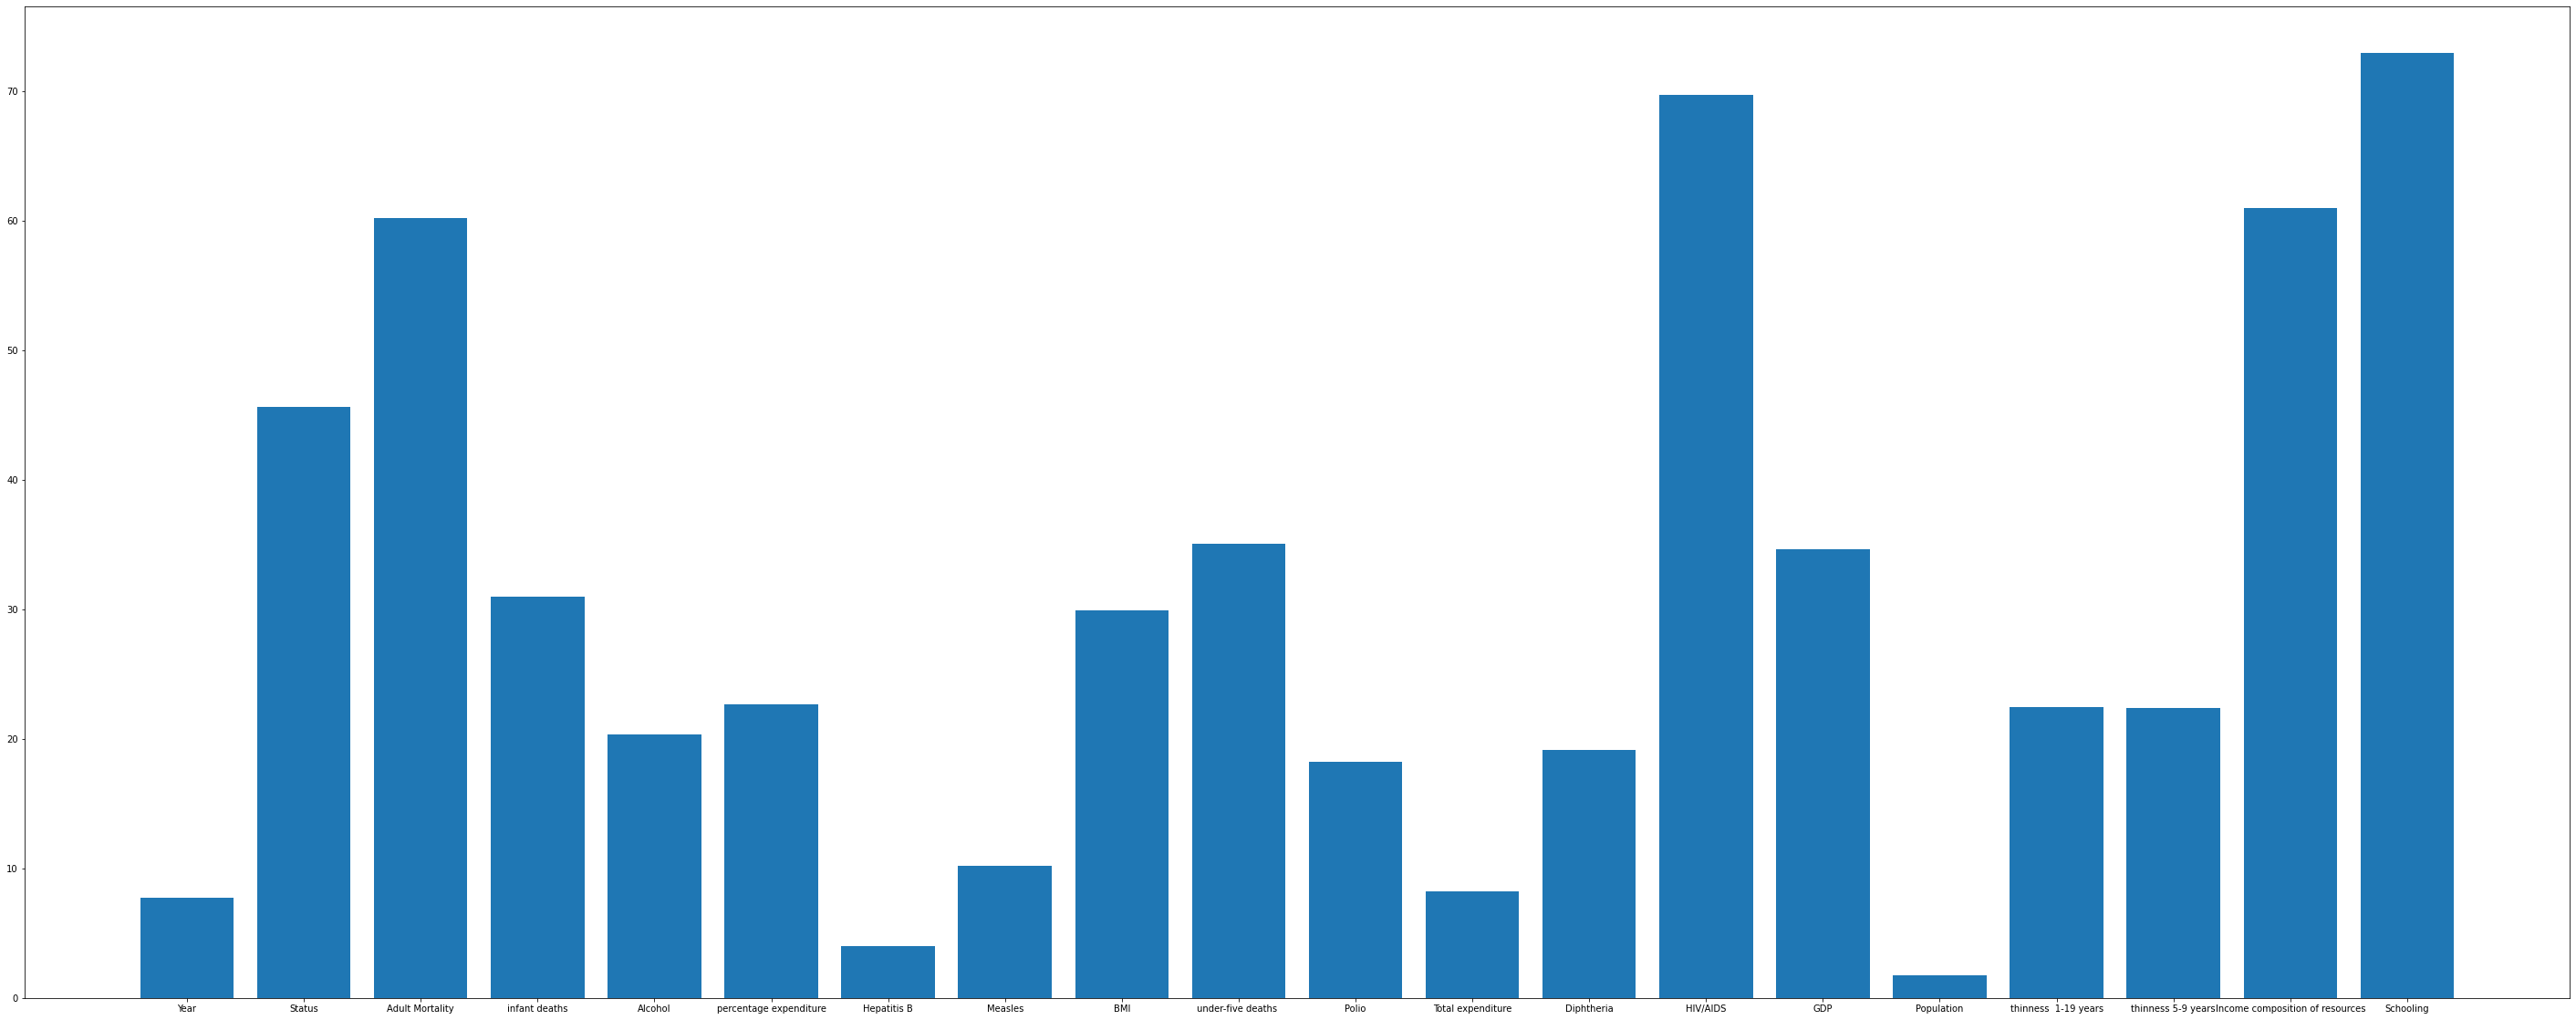

In [50]:
# feature extraction using ANOVA or univariate Statistical tests

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# specify features
X = df.drop(columns = ["Life expectancy"], axis = 1) #feature matrix
y = df["Life expectancy"] #target

fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X, y)
# transform train input data
X_train_fs = fs.transform(X)
features = X.columns
print("The feature scores generated using ANVOA method are: ")
features_map = []
for i in range(len(fs.scores_)):
    features_map.append([features[i], float(fs.scores_[i])])
features_map = sorted(features_map, key=lambda x:x[1], reverse = True)
for i in range(len(fs.scores_)):
	print('Feature %s: %f' % (features_map[i][0], features_map[i][1]))
# plot the scores
pyplot.figure(figsize=(50,20))
pyplot.bar([i for i in features], fs.scores_)
pyplot.show()

#### <u>Based on the above three tests I am selecting the following features for modelling of the data:</u>
<ul>
    <li>Schooling</li>
    <li>HIV/AIDS</li>
    <li>Income composition of resources</li>
    <li>Adult Mortality</li>
    <li>Status</li>
    <li>Under 5 deaths</li>
    <li>GDP</li>
    <li>BMI</li>
    <li>thinness 1-19 years</li>
    <li>Alcohol</li>
    <li>Diptheria</li>
    <li>Measles</li>
    <li>Total expenditure</li>
    <li>Year</li>
</ul>

In [108]:
selected_features = ["Year","Status","Adult Mortality","Alcohol","Measles","BMI","under-five deaths " ,"Total expenditure","Diphtheria","HIV/AIDS","GDP","thinness  1-19 years","Income composition of resources","Schooling"]

# Modelling

## No Free Lunch

In [109]:
from sklearn.model_selection import train_test_split
X = df[selected_features]
Y = df['Life expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101, shuffle=True)

In [110]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer, RobustScaler

# Standard Scalar
sscaler = StandardScaler()
X_train_ss = sscaler.fit_transform(X_train)
X_test_ss = sscaler.transform(X_test)

# Quantile Transformer
qscaler = QuantileTransformer(n_quantiles=100, random_state=43, output_distribution='normal')
X_train_qf = qscaler.fit_transform(X_train)
X_test_qf = qscaler.transform(X_test)

# Robust Scalar
rscaler = RobustScaler(with_scaling=True)
X_train_rs = rscaler.fit_transform(X_train)
X_test_rs = rscaler.transform(X_test)

In [111]:
# modules pick up
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# metric
from sklearn.metrics import confusion_matrix, classification_report

In [113]:
# with Standard Scalar
# variable name with different types of standardisation

models = []
models.append(('Logistic Regression', LogisticRegression(random_state=53)))
models.append(('Naive Bayes', GaussianNB()))
models.append(('K Nearest Neighbour', KNeighborsClassifier()))
models.append(('Decision Tree', tree.DecisionTreeClassifier(random_state=53)))
models.append(('Random Forest', RandomForestClassifier(random_state=53)))
models.append(('SVC', SVC(probability=True, random_state= 53)))
# models.append(('XGBoost', XGBClassifier(random_state=53)))
models.append(("LightGBM", LGBMClassifier(random_state = 53)))

# empty data frame
model_name = []
ss_score = []
qt_score = []
rs_score = []

for name, model in models:
    model_name.append(name)
    cv = cross_val_score(model, X_train_ss, y_train, cv = 5, scoring= "accuracy")
    ss_score.append(np.mean(cv))
    cv = cross_val_score(model, X_train_qf, y_train, cv = 5, scoring= "accuracy")
    qt_score.append(np.mean(cv))
    cv = cross_val_score(model, X_train_rs, y_train, cv = 5, scoring= "accuracy")
    rs_score.append(np.mean(cv))


model_score = pd.DataFrame(zip(model_name,ss_score, qt_score, rs_score) , columns=['Name', 'Standard Scalar', 'Quantile Transformer', 'Robust Scalar'])

model_score

Name  Standard Scalar  Quantile Transformer  Robust Scalar
0  Logistic Regression         0.190638              0.172766       0.162979
1          Naive Bayes         0.080426              0.076596       0.092766
2  K Nearest Neighbour         0.263404              0.233191       0.224255
3        Decision Tree         0.370213              0.369787       0.368936
4        Random Forest         0.489362              0.485957       0.486383
5                  SVC         0.209787              0.181702       0.110213
6             LightGBM         0.462553              0.453191       0.454894

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

def get_best_param_score(classifier):
    print(classifier.estimator)
    print(classifier.best_score_)
    print(classifier.best_params_)

In [117]:
# Instaniate Support Vector Machine classifier
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [10, 50, 100, 500, 1000],
                                  'criterion':['gini','entropy'],
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}

# Randomized search to find approximate good parameters to reduce computation time
clf_rf = RandomizedSearchCV(rf, param_distributions= param_grid, cv = 5)
best_clf_rf = clf_rf.fit(X_train_ss,y_train)
get_best_param_score(best_clf_rf)

RandomForestClassifier(random_state=1)
0.49361702127659574
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': False}
